# LP Modes
The modes of hollow core photonic crystal fibers (HCPCFs) can be approximated as linear polarized ($LP_{nm}$) modes.

\begin{equation}
\begin{split}
LP_{mn}^{j}(r, \phi, z) \vec{p} & = E_{0} J_{m}\left( \frac{u_{mn} r}{r_{co}} \right) \cos \left(n \phi - j \frac{\pi}{2} \right) e^{-i \beta_{mn}z} \vec{p}\\
& = E_{0} \epsilon_{mn}(r, \phi) e^{-i \beta_{mn}z}\vec{p}
\end{split}
\end{equation}


The $LP_{01}$ mode is primarily excited in the HCPCF when coupled to a free-space Gaussian beam but misalignments result in minute excitations of the first excited $LP_{11}$ mode. Note that j=0 corresponds to orienting the first excoted mode to the x axis and j=1 corresponds to orienting it along the y axis. Unless active mode stabilisation is employed, it will appear as a superposition of j=0 and j=1.

### $LP_{01}$ and $LP_{11}$ Modes plotted in the radial and transverse planes

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn_zeros, jv
from matplotlib.colors import TwoSlopeNorm


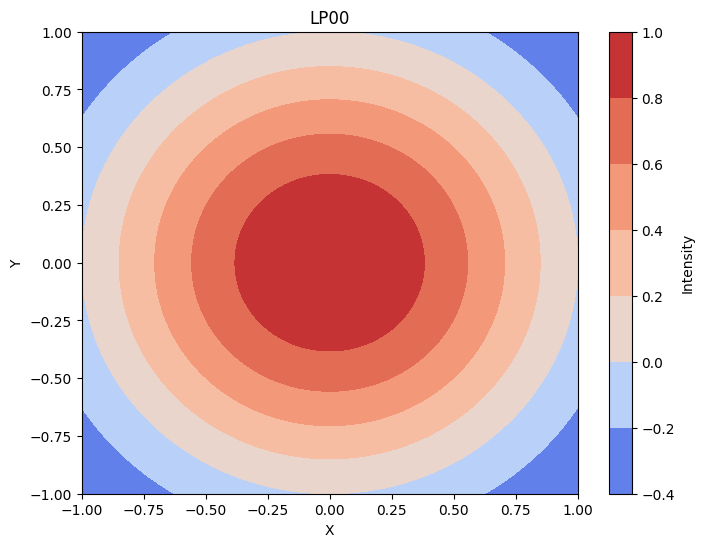

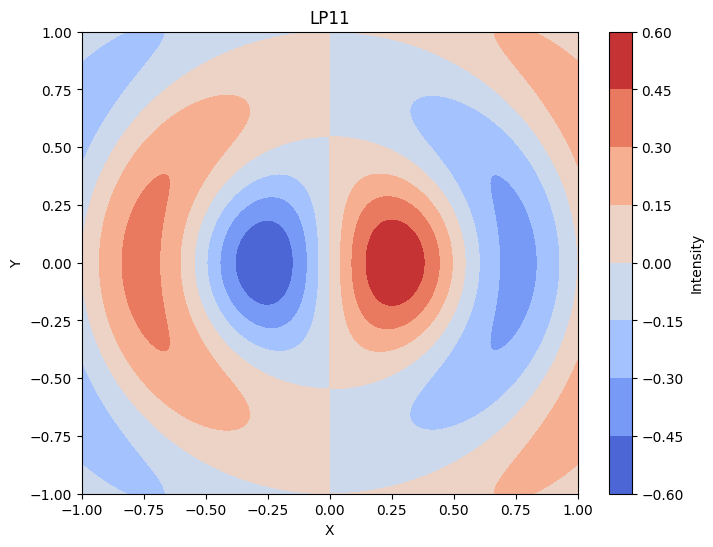

In [3]:
# radial/transverse plane - equivalent to just plotting epsilon and setting z = 0 (or some other constant, but 0 is easiest)
r_co = 1

def epsilon(r,phi,m,n,j=0):
    # r = np.sqrt(x**2 + y**2)
    # phi = np.arctan(y/x)
    u_mn = jn_zeros(m,n+1)[n]
    besselarg = (u_mn*r)/(r_co)
    return jv(m, besselarg) * np.cos(n * phi - j * (np.pi / 2))

x = np.linspace(-1, 1, 1000)
y = np.linspace(-1, 1, 1000)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
Phi = np.arctan2(Y, X)

for m,n in [0,0],[1,1]:

    Z = epsilon(R,Phi,m,n)

    v_min, v_max = Z.min(), Z.max()

    plt.figure(figsize=(8, 6))
    norm = TwoSlopeNorm(vcenter=0, vmax=v_max)
    contour = plt.contourf(X, Y, Z, cmap='coolwarm', norm=norm)
    plt.title('LP{}{}'.format(m, n))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar(contour, label='Intensity')
    plt.show()

    # soooooo it should be plotting the LP01 and LP11 modes but for some reason the LP00 mode looks how
    # the LP01 mode should look and the LP00 mode doesnt even exist so idk what's going on here but I'll
    # take it I guess

C:\Users\marku\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\contour.py:1515: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = z.max().astype(float)
C:\Users\marku\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\contour.py:1516: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = z.min().astype(float)
C:\Users\marku\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\ma\core.py:2846: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


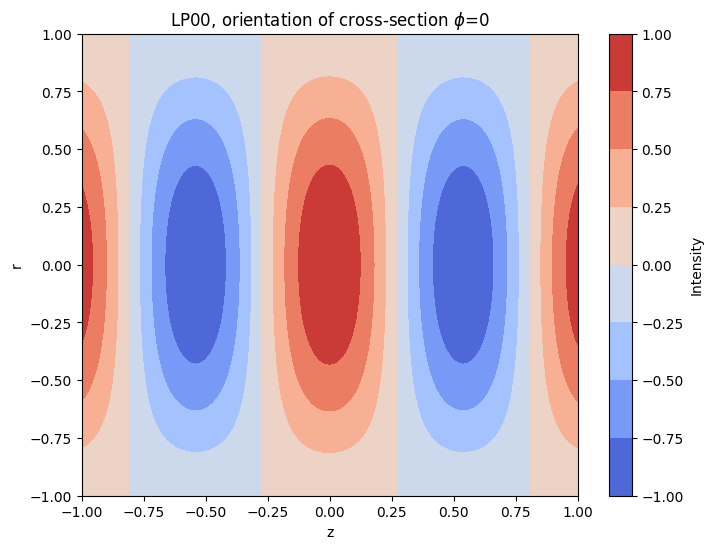

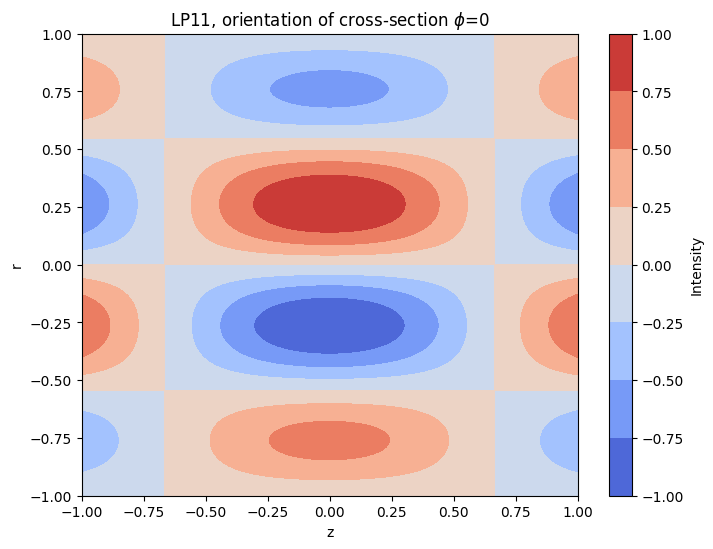

In [4]:
# In the axial/longitudinal plane. This time, epsilon is multiplied by some oscillating value dependent on
# z and will also vary depending on the "slice" we take relative to directly down the centre

# SET WAVELENGTH AND CORE RADIUS AND RUN FROM HERE #########
wavelength = 1
r_co = 1

omega = 2*np.pi*3e8/wavelength
###############################################

def beta(m,n,lam=wavelength):
    u_mn = jn_zeros(m,n+1)[n]
    return (2*np.pi/lam) * ( 1 - 0.5*( (u_mn*lam)/(2*np.pi*r_co) )**2 )
    

def LP(z,r,phi,E0,m,n,j=0,lam=wavelength,dir='right'):
    eps = epsilon(r,phi,m,n,j) # returns an array
    bet = beta(m,n,lam) # returns a number
    if dir == 'right':
        result = E0*eps*np.exp(-1j*bet*z)
    elif dir =='left':
        result = E0*eps*np.exp(1j*bet*z)
    return result/np.max(result)

r = np.linspace(-1,1,1000)
z = np.linspace(-1,1,1000)

R,Z = np.meshgrid(r,z)

# to take just a "slice", set phi constant (I'll set it as either 0 or np.pi/2 depending on the cross section
# I want)
phi = 0

for m,n in [0,0],[1,1]:

    F = LP(Z,R,phi,1,m,n)

    v_min, v_max = F.min(), F.max()

    plt.figure(figsize=(8, 6))
    #norm = TwoSlopeNorm(vcenter=0, vmax=v_max)
    contour = plt.contourf(Z, R, F, cmap='coolwarm')#, norm=norm)
    plt.title('LP{}{}, orientation of cross-section $\phi$={}'.format(m, n,phi))
    plt.xlabel('z')
    plt.ylabel('r')
    plt.colorbar(contour, label='Intensity')
    plt.show()


# Creating a standing wave pattern viewed from a longitudinal and transverse cross section

- For Transverse plane (at some z=const) use r= $-1 \rightarrow 1$, $\phi= 0 \rightarrow 2 \pi$ and z= const
- For Longitudinal plane (at some r=const) use r= $-1 \rightarrow 1$, $\phi$= const, z= $-1 \rightarrow 1$

Let's say that we perfectly align and excite only the fundamental mode each direction in the fiber. We have:

\begin{equation}
    E(r, \phi, z) = E_{0 \rightarrow} \epsilon_{00} e^{-i \beta_{\rightarrow} z} + E_{0 \leftarrow} \epsilon_{00} e^{i \beta_{\leftarrow} z}
\end{equation}

in the thesis they say that the fundamental and excited modes are excited in one direction only and that in the opposite direction only the fundamental mode is excited. idk why this is
I will also multiply the modes by an oscillating time term $e^{i \omega t}$ because they are propagating.

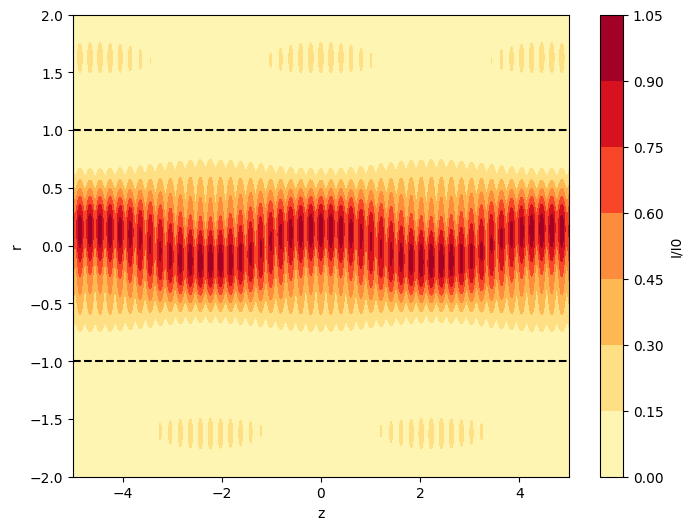

In [44]:
%matplotlib inline
from ipywidgets import interact, FloatSlider

# right travelling wave
E0r_1 = 1
E0r_2 =1 # dont set these to 0 bc function cant handle yet
lamr = 0.4
betar = beta(0,0,lamr)

# left travelling wave
E0l_1 = 1
E0l_2 = 1 # dont set these to 0 bc function cant handle yet
laml=0.4
betal = beta(0,0,laml)


# Total (Longitudinal)
r = np.linspace(-2,2,1000)
z = np.linspace(-5,5,1000)
R,Z = np.meshgrid(r,z)
phi = 0

Er_1 = 0.9*LP(Z, R, phi, E0r_1, 0, 0, 0, lamr, 'right')
Er_2 = 0.1*LP(Z, R, phi, E0r_2, 1, 1, 0, lamr, 'right') # set to 0 here
El_1 = 0.1*LP(Z, R, phi, E0l_1, 0, 0, 0, laml, 'left')
El_2 = 0#LP(Z, R, phi, E0l_2, 1, 1, 0, laml, 'left') # set to 0 here



E_tot = Er_1 + El_1 + Er_2 + El_2
I_tot = E_tot * np.conj(E_tot)
I_tot = I_tot/np.max(I_tot)


v_min, v_max = I_tot.min(), I_tot.max()

plt.figure(figsize=(8, 6))
contour = plt.contourf(Z, R, I_tot, cmap='YlOrRd')
plt.axhline(y=r_co, color='black', linestyle='--')
plt.axhline(y=-r_co, color='black', linestyle='--')
plt.xlabel('z')
plt.ylabel('r')
plt.colorbar(contour, label='I/I0')
plt.show()


# def update_plot(E0r_2,E0l_2):
#     E0r_1 = 0.5 - E0r_2 # adjust fundamental mode values so everything always adds up to 1
#     E0l_1 = 0.5 - E0l_2
    
#     Er_1 = LP(Z, R, phi, E0r_1, 0, 0, 0, lamr, 'right')
#     Er_2 = LP(Z, R, phi, E0r_2, 1, 1, 0, lamr, 'right')
#     El_1 = LP(Z, R, phi, E0l_1, 0, 0, 0, laml, 'left')
#     El_2 = LP(Z, R, phi, E0l_2, 1, 1, 0, laml, 'left')

  
    
#     E_tot = Er_1 + El_1 + Er_2 + El_2
#     I_tot = E_tot * np.conj(E_tot)
#     I_tot = I_tot/np.max(I_tot)
    
    
#     v_min, v_max = I_tot.min(), I_tot.max()
    
#     plt.figure(figsize=(8, 6))
#     contour = plt.contourf(Z, R, I_tot, cmap='YlOrRd')
#     plt.axhline(y=r_co, color='black', linestyle='--')
#     plt.axhline(y=-r_co, color='black', linestyle='--')
#     plt.xlabel('z')
#     plt.ylabel('r')
#     plt.colorbar(contour, label='I/I0')
#     plt.show()

# # Create the slider widget
# E0r_2_slider = FloatSlider(value=0.01, min=0.01, max=0.3, step=0.01, description='E0r_2')
# E0l_2_slider = FloatSlider(value=0.01, min=0.01, max=0.3, step=0.01, description='E0l_2')

# # Link the slider to the update function
# interact(update_plot, E0r_2=E0r_2_slider,E0l_2=E0l_2_slider)


The above plot is the instantaneous intensity taken at some t=fixed and just squaring the absolute magnitude of the Electric field. If t were allowed to increase, the mode would flash alternately and the average taken of this would yield a smoother plot like the one in David's thesis. We can see that even just weakly exciting the second mode in both directions yields modulations in the path of the particle.